An example colocating Aqua modis and Cloudsat observations

In [1]:
import pathlib
from datetime import datetime

import numpy as np
from numpy import ma
import xarray as xr
from satpy import Scene
from sklearn.neighbors import BallTree
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from cloudsatipy import open_cloudsat

In [2]:
data_path = pathlib.Path("../data")

In [3]:
cwc_file = list(data_path.glob("2010195112321_22399_CS_2B-CWC-RVOD_GRANULE_P1_R05_E03_F00.hdf"))[0]

In [4]:
open_cloudsat(cwc_file)

<xarray.Dataset> Size: 244MB
Dimensions:                          (Nray: 37081, Nbin: 125)
Coordinates:
    DEM_elevation                    (Nray) float32 148kB nan nan ... nan nan
    Height                           (Nray, Nbin) float32 19MB 2.503e+04 ... ...
    Latitude                         (Nray) float32 148kB -0.001594 ... 0.009657
    Longitude                        (Nray) float32 148kB -144.6 ... -169.3
    Pitch_offset                     float64 8B 0.16
    Profile_time                     (Nray) datetime64[ns] 297kB 2010-07-14T1...
    Range_to_intercept               (Nray) float32 148kB 705.5 705.5 ... 705.4
    Roll_offset                      float64 8B 0.0
    TAI_start                        float64 8B 5.533e+08
    UTC_start                        float64 8B 4.1e+04
    Vertical_binsize                 float64 8B 239.8
Dimensions without coordinates: Nray, Nbin
Data variables: (12/26)
    Data_quality                     (Nray) float32 148kB 0.0 0.0 ... 0.0 0.0
    Data_status                      (Nray) float32 148kB 4.148e+03 ... 4.148...
    RayStatus_validity               (Nray) float32 148kB 0.0 0.0 ... 0.0 0.0
    Data_targetID                    (Nray) float32 148kB 0.0 0.0 ... 0.0 0.0
    Navigation_land_sea_flag         (Nray) float32 148kB 2.0 2.0 ... 2.0 2.0
    Liq_Water_Content                (Nray, Nbin) float32 19MB nan nan ... nan
    ...                               ...
    Ice_Water_Path_Uncert            (Nray) float32 148kB nan nan ... nan nan
    Phase                            (Nray, Nbin) float32 19MB 1.0 1.0 ... 0.0
    Radar_Reflectivity_Fwd           (Nray, Nbin) float32 19MB nan nan ... nan
    PIA_Fwd                          (Nray) float32 148kB nan nan ... nan nan
    Error_Flag                       (Nray) float32 148kB 9.0 9.0 ... 9.0 9.0
    Warning_Flag                     (Nray) float32 148kB 0.0 0.0 ... 0.0 0.0
Attributes: (12/13)
    granule_number:     22399.0
    ID_SITE:            Cooperative Institute for Research in the Atmosphere
    ID_CENTER:          CloudSat Data Processing Center
    ID_CENTER_URL:      http://cloudsat.cira.colostate.edu
    ID_CREATED:         Sun Mar 24 18:27:21 2019
    product_version:    P1_R05
    ...                 ...
    algorithm_version:  P1_R05.0
    algorithm_name:     2B-CWC-RVOD
    start_time:         20100714112328
    end_time:           20100714112328
    start_latlon:       [-0.0015936850104480982, -144.5519561767578]
    end_latlon:         [0.009657364338636398, -169.2703399658203]

In [5]:
cwc_ds = open_cloudsat(cwc_file, variable="Radar_Reflectivity_Fwd")

In [6]:
myd02_file = list(data_path.glob("MYD021KM.A2010195.1210.061.2018061010504.hdf"))[0]
myd03_file = list(data_path.glob("MYD03.A2010195.1210.061.2018060012329.hdf"))[0]

In [7]:
Scene(filenames=[str(myd02_file)], reader='modis_l1b', reader_kwargs={'mask_saturated': False})

In [7]:
scn = Scene(filenames=[str(myd02_file), str(myd03_file)], reader='modis_l1b', reader_kwargs={'mask_saturated': False})

In [8]:
scn.all_dataset_names()

['1',
 '10',
 '11',
 '12',
 '13hi',
 '13lo',
 '14hi',
 '14lo',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'latitude',
 'longitude',
 'satellite_azimuth_angle',
 'satellite_zenith_angle',
 'solar_azimuth_angle',
 'solar_zenith_angle']

In [9]:
scn.load(["latitude", "longitude"], resolution=1000)

In [10]:
scn.load(["1", "2", "26", "22", "29", "31", "32"], resolution=1000)

In [11]:
modis_ds = scn.to_xarray()

In [12]:
modis_ds

<xarray.Dataset> Size: 99MB
Dimensions:     (y: 2030, x: 1354)
Coordinates:
    longitude   (y, x) float32 11MB dask.array<chunksize=(1540, 1354), meta=np.ndarray>
    latitude    (y, x) float32 11MB dask.array<chunksize=(1540, 1354), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    CHANNEL_1   (y, x) float32 11MB dask.array<chunksize=(1540, 1354), meta=np.ndarray>
    CHANNEL_2   (y, x) float32 11MB dask.array<chunksize=(1540, 1354), meta=np.ndarray>
    CHANNEL_22  (y, x) float32 11MB dask.array<chunksize=(1540, 1354), meta=np.ndarray>
    CHANNEL_26  (y, x) float32 11MB dask.array<chunksize=(1540, 1354), meta=np.ndarray>
    CHANNEL_29  (y, x) float32 11MB dask.array<chunksize=(1540, 1354), meta=np.ndarray>
    CHANNEL_31  (y, x) float32 11MB dask.array<chunksize=(1540, 1354), meta=np.ndarray>
    CHANNEL_32  (y, x) float32 11MB dask.array<chunksize=(1540, 1354), meta=np.ndarray>
Attributes:
    history:      Created by pytroll/satpy on 2024-07-08 12:02:28.854953
    Conventions:  CF-1.7

Text(0.5, 1.0, 'Modis-Cloudsat intersect 2010-07-24 12:10')

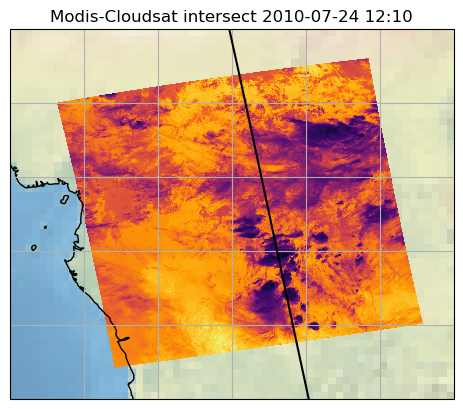

In [13]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection":ccrs.PlateCarree()})

ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.pcolormesh(modis_ds.longitude, modis_ds.latitude, modis_ds.CHANNEL_31, cmap="inferno", vmin=180, vmax=320)
ax.plot(cwc_ds.Longitude, cwc_ds.Latitude, "k-", transform=ccrs.Geodetic())
ax.set_extent([5, 35, -10, 15], ccrs.PlateCarree())
ax.set_title(f'Modis-Cloudsat intersect 2010-07-24 12:10')


Now find nearest modis points for each Cloudsat measurement

In [14]:
btree = BallTree(
    np.radians(np.stack([modis_ds.latitude.values.ravel(), modis_ds.longitude.values.ravel()], -1)), 
    metric = "haversine",
)

In [15]:
distances, indexes = btree.query(
    np.radians(np.stack([cwc_ds.Latitude.values.ravel(), cwc_ds.Longitude.values.ravel()], -1)), 
)
distances = distances.ravel()
indexes = indexes.ravel()

In [16]:
distances.shape

(37081,)

In [17]:
indexes.shape

(37081,)

In [18]:
# Filter distances closer than modis resolution
dist_filter = distances <= np.radians(0.01)

Crop Cloudsat and Modis datasets to overlapping points

In [19]:
cwc_overlap = cwc_ds.sel(Nray=dist_filter)

In [20]:
modis_y, modis_x = np.unravel_index(indexes[dist_filter], modis_ds.latitude.shape)

In [21]:
modis_overlap = modis_ds.isel(
    x = xr.DataArray(modis_x, dims="Nray"),
    y = xr.DataArray(modis_y, dims="Nray"),
)

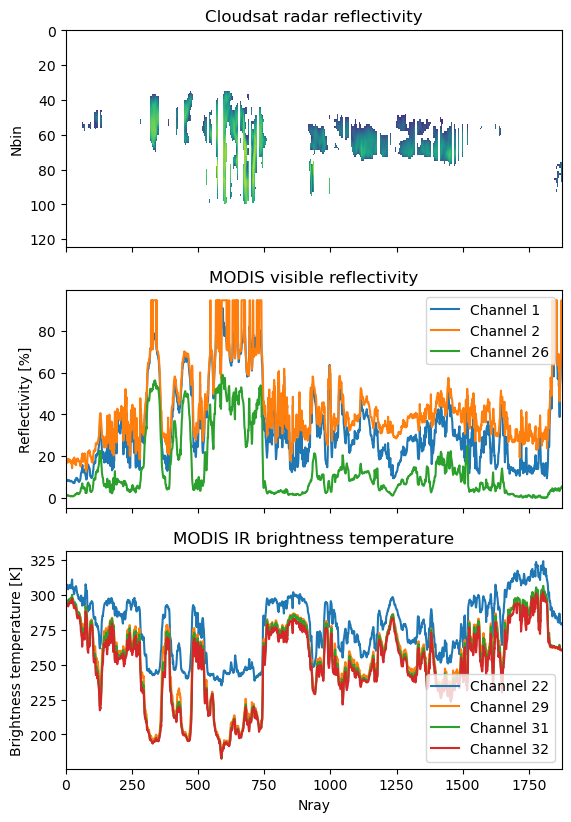

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6.4,9.6))

ax1.imshow(cwc_overlap.Radar_Reflectivity_Fwd.T, origin="upper", aspect="auto")
ax1.set_title("Cloudsat radar reflectivity")
ax1.set_ylabel("Nbin")

ax2.plot(modis_overlap.CHANNEL_1)
ax2.plot(modis_overlap.CHANNEL_2)
ax2.plot(modis_overlap.CHANNEL_26)
ax2.set_title("MODIS visible reflectivity")
ax2.set_ylabel("Reflectivity [%]")
ax2.legend(["Channel 1", "Channel 2", "Channel 26"])

ax3.plot(modis_overlap.CHANNEL_22)
ax3.plot(modis_overlap.CHANNEL_29)
ax3.plot(modis_overlap.CHANNEL_31)
ax3.plot(modis_overlap.CHANNEL_32)
ax3.set_title("MODIS IR brightness temperature")
ax3.set_ylabel("Brightness temperature [K]")
ax3.set_xlabel("Nray")
ax3.legend(["Channel 22", "Channel 29", "Channel 31", "Channel 32"])
